### Łukasz Szyszka, Gr. Nr 6, Piątki Godz. 08:00

<center> Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasyfikatora bayesowskiego.

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [47]:
df = pd.read_csv('data.csv', sep=',')
new_df = df.copy()
print('Wczytana baza danych:')
display(new_df)

Wczytana baza danych:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [48]:
text_category = [col for col in df.columns if new_df[col].dtype == 'O']

print('Nazwy kolumn zawierające dane tekstowe:')
for obj in text_category:
    print(obj)

num_category = [col for col in df.columns if new_df[col].dtype != 'O']

print('\nNazwy kolumn zawierające dane liczbowe:')
for obj in num_category:
    print(obj)

Nazwy kolumn zawierające dane tekstowe:
workclass
education
marital_status
occupation
relationship
race
sex
native_country
income

Nazwy kolumn zawierające dane liczbowe:
age
fnlwgt
education_num
capital_gain
capital_loss
hours_per_week


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [49]:
for column in new_df.columns:
    print("Nazwa kolumny: {}".format(column))
    print("Dane z kolumny i ich liczba wystąpień:")
    print(new_df[column].value_counts(), '\n')

Nazwa kolumny: age
Dane z kolumny i ich liczba wystąpień:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

Nazwa kolumny: workclass
Dane z kolumny i ich liczba wystąpień:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

Nazwa kolumny: fnlwgt
Dane z kolumny i ich liczba wystąpień:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64 

Nazwa kolumny: education
Dane z kolumny i ich liczba wystąpień:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Asso

Jak widać, baza danych wykorzystuje sekwencję znaków " ?" do oznaczenia miejsc, gdzie brakuje danych. Takie sekwencje warto dla wygodniejszej analizy zastąpić wartościami np.nan.

In [50]:
new_df.replace(" ?", np.nan, inplace=True)

for column in new_df.columns:
    print("Nazwa kolumny: {}".format(column))
    print("Dane z kolumny i ich liczba wystąpień:")
    print(new_df[column].value_counts(), '\n')

print("Baza danych po wprowadzeniu wstępnych modyfikacji:")
display(new_df)

Nazwa kolumny: age
Dane z kolumny i ich liczba wystąpień:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

Nazwa kolumny: workclass
Dane z kolumny i ich liczba wystąpień:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

Nazwa kolumny: fnlwgt
Dane z kolumny i ich liczba wystąpień:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64 

Nazwa kolumny: education
Dane z kolumny i ich liczba wystąpień:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [51]:
X = new_df.drop(["income"], axis=1)
Y = new_df["income"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("Informacje o danych treningowych X_train")
print(X_train.info())

print("\nInformacje o danych testowych X_test")
print(X_test.info())

print('\nOdsetek brakujących danych w danych treningowych (jeśli ten odsetek jest różny od 0)')
for col in X_train.columns:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean()))

Informacje o danych treningowych X_train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 32098 to 2732
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       21516 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education_num   22792 non-null  int64 
 5   marital_status  22792 non-null  object
 6   occupation      21514 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital_gain    22792 non-null  int64 
 11  capital_loss    22792 non-null  int64 
 12  hours_per_week  22792 non-null  int64 
 13  native_country  22378 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.6+ MB
None

Informacje o danych testowych X_test
<class 'pandas.core.frame.DataFrame'>
Int64Index: 

Zastąpienie brakujących danych najczęściej występującą wartością.

In [52]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

Sprawdzenie, czy dane treningowe i testowe nie zawierają braków:

In [53]:
text_category = [col for col in X.columns if new_df[col].dtype == 'O']

print('Dane treningowe:')
display(X_train[text_category].isnull().sum())

Dane treningowe:


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [54]:
print('\nDane testowe:')
display(X_test[text_category].isnull().sum())


Dane testowe:


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tekstowych z pozostałych kategorii na wartości liczbowe:

In [55]:
text_category = [col for col in X.columns if new_df[col].dtype == 'O']

encoder = ce.OneHotEncoder(cols = text_category)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację danych ze zbiorów testowych i treningowych. Podaj dokładność modelu i macierz błędu wraz z jej wykresem i interpretacją.

Dokładność modelu dla danych treningowych Y_train:
0.806730

Macierz błędu - wartości - (dla danych treningowych):
[[13975  3338]
 [ 1067  4412]]

Dane prawdziwie dodatnie =  13975
Dane prawdziwie ujemne =  4412
Dane fałszywie dodatnie =  3338
Dane fałszywie ujemne =  1067

Macierz błędu - wykres - (dla danych treningowych):


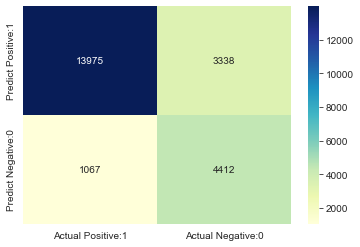

In [56]:
gnb = GaussianNB().fit(X_train, Y_train)

Y_pred_train = gnb.predict(X_train)
Y_pred = gnb.predict(X_test)

print("Dokładność modelu dla danych treningowych Y_train:")
print("{:.6f}".format(accuracy_score(Y_train, Y_pred_train)))

conf_mat_train = confusion_matrix(Y_train, Y_pred_train)

print('\nMacierz błędu - wartości - (dla danych treningowych):')
print(conf_mat_train)

print('\nDane prawdziwie dodatnie = ', conf_mat_train[0,0])
print('Dane prawdziwie ujemne = ', conf_mat_train[1,1])
print('Dane fałszywie dodatnie = ', conf_mat_train[0,1])
print('Dane fałszywie ujemne = ', conf_mat_train[1,0])

print('\nMacierz błędu - wykres - (dla danych treningowych):')
cm_matrix_train = pd.DataFrame(data=conf_mat_train, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix_train, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Wnioski cz. 1.:
- Dla danych treningowych model predykcji został obliczony z całkiem wysoką precyzją. Jednakże, mimo wszystko dane przewidziane błędnie stanowią około 1/4 danych przewidzianych prawidłowo.


Dokładność modelu dla danych testowych Y_test:
0.808271

Macierz błędu - wartości - (dla danych testowych):
[[5999 1408]
 [ 465 1897]]

Dane prawdziwie dodatnie =  5999
Dane prawdziwie ujemne =  1897
Dane fałszywie dodatnie =  1408
Dane fałszywie ujemne =  465

Macierz błędu - wykres - (dla danych testowych):


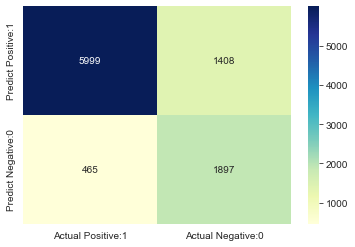

In [57]:
print("\nDokładność modelu dla danych testowych Y_test:")
print("{:.6f}".format(accuracy_score(Y_test, Y_pred)))

conf_mat = confusion_matrix(Y_test, Y_pred)

print('\nMacierz błędu - wartości - (dla danych testowych):')
print(conf_mat)

print('\nDane prawdziwie dodatnie = ', conf_mat[0,0])
print('Dane prawdziwie ujemne = ', conf_mat[1,1])
print('Dane fałszywie dodatnie = ', conf_mat[0,1])
print('Dane fałszywie ujemne = ', conf_mat[1,0])

print('\nMacierz błędu - wykres - (dla danych testowych):')
cm_matrix = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Wnioski cz. 2.:
- Dla danych testowych sytuacja jest zbliżona do tej dla danych treningowych - tutaj także dane przewidziane błędnie stanowią około 1/4 danych przewidzianych prawidłowo.

Przeprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładność modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski, od czego zależą otrzymane wyniki.

In [58]:
X = new_df[["race", "native_country"]]
Y = new_df["income"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("Informacje o danych treningowych X_train")
print(X_train.info())

print("\nInformacje o danych testowych X_test")
print(X_test.info())

encoder = ce.OneHotEncoder(cols=["race", "native_country"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Informacje o danych treningowych X_train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 32098 to 2732
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race            22792 non-null  object
 1   native_country  22378 non-null  object
dtypes: object(2)
memory usage: 534.2+ KB
None

Informacje o danych testowych X_test
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 22278 to 20721
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race            9769 non-null   object
 1   native_country  9600 non-null   object
dtypes: object(2)
memory usage: 229.0+ KB
None


Dokładność modelu dla danych treningowych Y_train:
0.291023

Macierz błędu - wartości - (dla danych treningowych):
[[ 1264 16049]
 [  110  5369]]

Dane prawdziwie dodatnie =  1264
Dane prawdziwie ujemne =  5369
Dane fałszywie dodatnie =  16049
Dane fałszywie ujemne =  110

Macierz błędu - wykres - (dla danych treningowych):


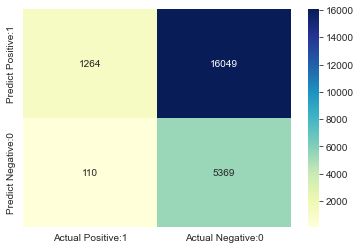

In [59]:
gnb = GaussianNB().fit(X_train, Y_train)

Y_pred_train = gnb.predict(X_train)
Y_pred = gnb.predict(X_test)

print("Dokładność modelu dla danych treningowych Y_train:")
print("{:.6f}".format(accuracy_score(Y_train, Y_pred_train)))

conf_mat_train = confusion_matrix(Y_train, Y_pred_train)

print('\nMacierz błędu - wartości - (dla danych treningowych):')
print(conf_mat_train)

print('\nDane prawdziwie dodatnie = ', conf_mat_train[0,0])
print('Dane prawdziwie ujemne = ', conf_mat_train[1,1])
print('Dane fałszywie dodatnie = ', conf_mat_train[0,1])
print('Dane fałszywie ujemne = ', conf_mat_train[1,0])

print('\nMacierz błędu - wykres - (dla danych treningowych):')
cm_matrix_train = pd.DataFrame(data=conf_mat_train, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix_train, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Wnioski cz.3.:
- Dla danych treningowych model predykcji został wyliczony z bardzo niską precyzją. Już sama analiza obliczonej dokładności modelu pokazuje, że ta dokładność nie przekracza 30%. Dodatkowo, analizując wykres macierzy błędu można łatwo zauważyć, że w modelu występuje bardzo dużo wartości fałszywie dodatnich, których jest wielokrotnie więcej niż danych prawdziwie dodatnich. Znacząco zaniża to dokładność obliczonego modelu.


Dokładność modelu dla danych testowych Y_test:
0.291023

Macierz błędu - wartości - (dla danych testowych):
[[ 534 6873]
 [  53 2309]]

Dane prawdziwie dodatnie =  534
Dane prawdziwie ujemne =  2309
Dane fałszywie dodatnie =  6873
Dane fałszywie ujemne =  53

Macierz błędu - wykres - (dla danych testowych):


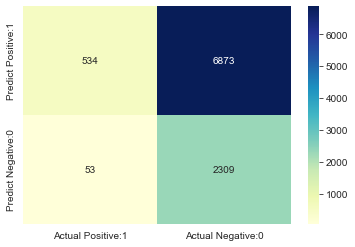

In [60]:
print("\nDokładność modelu dla danych testowych Y_test:")
print("{:.6f}".format(accuracy_score(Y_test, Y_pred)))

conf_mat = confusion_matrix(Y_test, Y_pred)

print('\nMacierz błędu - wartości - (dla danych testowych):')
print(conf_mat)

print('\nDane prawdziwie dodatnie = ', conf_mat[0,0])

print('Dane prawdziwie ujemne = ', conf_mat[1,1])

print('Dane fałszywie dodatnie = ', conf_mat[0,1])

print('Dane fałszywie ujemne = ', conf_mat[1,0])

print('\nMacierz błędu - wykres - (dla danych testowych):')
cm_matrix = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Wnioski cz. 4.:
- Dla danych testowych sytuacja jest podobna, jak dla danych treningowych - tutaj też dokładność obliczonego modelu nie przekracza 30%, a w wysokim stopniu wpływa na to duża liczba wartości fałszywie dodatnich.

### Wnioski - podsumowanie:
- Bazując na poprzednich 4 częściach wniosków można stwierdzić, że dokładność obliczonego modelu predykcji w dużej mierze zależy od wyboru danych, na podstawie których taki model będzie tworzony. Właściwe dokonanie wspomnianego wyboru jest konieczne do osiągnięcia wysokiej dokładności dla przewidywanych danych.